# Data Science and Business Analytics Internship Task : 6

# The Sparks Foundation - GRIPJAN 21

# Task 6 - Prediction using Decision Tree Algorithm

# Identification of Type of Flower Using Decision Tree Classifier

## Problem Statement

- From the given 'Iris' dataset, train the Decision Tree Classifier to predict which class the data point belongs.

## Dataset Description

- Dataset has been collected from https://bit.ly/3kXTdox
- Dataset consists of 5 Columns viz. 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' are Independent variables while 'Species' is a dependent variable 

## Task

- Create the Decision Tree classifier and visualize it graphically.

## Author : Sarthak A. Kasturiwale

# 1. Importing Dependencies

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd

# Importing Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

# Importing SK-Learn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

# Other Libraries
from prettytable import PrettyTable
import pickle
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

# 2. Importing Data & Basic Data Analysis

In [2]:
# Importing Data from Local File
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Observations:**
- There are 6 columns in the Data.
- **'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'** columns are independent Variables while **'Species'** column is a depedent variable
- There is column **'Id'** which is not useful so we are going to ommit it in the further analysis

In [3]:
# Checking the shape of the data for identification of Rows & Columns in the dataset
data.shape

(150, 6)

In [4]:
# Identifying all the column names in the data
list(data.columns)

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [5]:
# Gathering some basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking for missing or null Values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Observations:**
- As there are no missing or null values in the data, so we can move forward in the analysis.

In [7]:
# Dropping the duplicate values
data.drop_duplicates(inplace = True)

In [8]:
# Checking the shape of the data
data.shape

(150, 6)

**Observations:**
- As there are no duplicate values in the data, so we can move forward in the analysis.

In [9]:
# Some basic Statastics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Label encoding the Species column and converting it to numeric values
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
# Finding Co-relation between variables
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

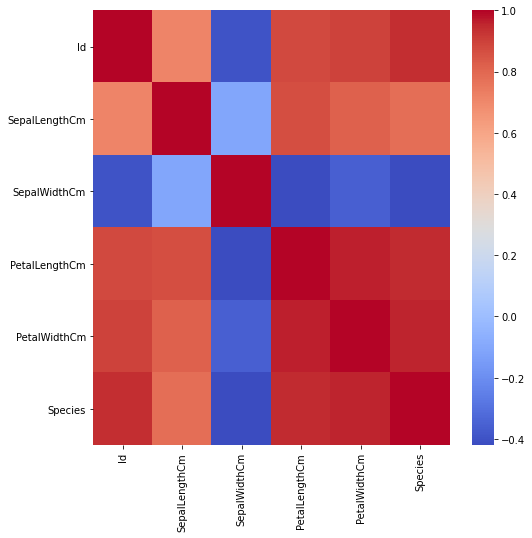

In [12]:
sns.heatmap(data = data.corr(),cmap = 'coolwarm')

**Observations:**
- From the graph above, we can clearly see that there is a **high positive co-relation** between 'SepalLengthCm' , 'PetalLengthCm' & 'PetalWidthCm'.

## Univariate Analysis

- As there are only 4 Features we can do Univariate Analysis. But if we have 1000's of features then Univariate Analysis can be expensive

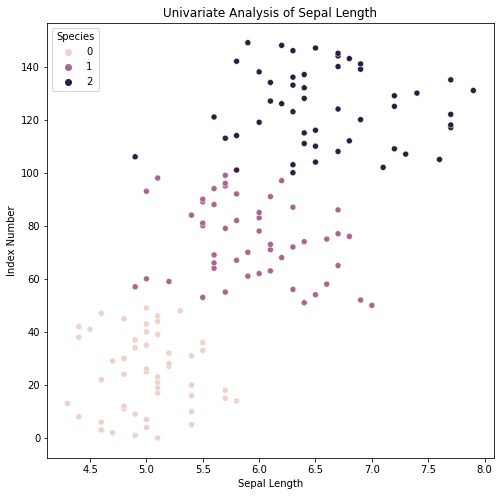

In [13]:
# Plotting for 'SepalLengthCm' 
fig, ax = plt.subplots()
sns.scatterplot(x = data['SepalLengthCm'], y = data.index, data = data, ax = ax, hue = data['Species'])
ax.set_title('Univariate Analysis of Sepal Length')
ax.set_ylabel('Index Number')
ax.set_xlabel('Sepal Length')
plt.grid(b = False)
plt.show()

**Observations:**
- From the above plot we can make rough observation that we can simply use if-else conditions to seperate the Species.
- Yes, we can see some overlaps between the 'Sepal Lengths' of the species but most of the points can be easily classified.

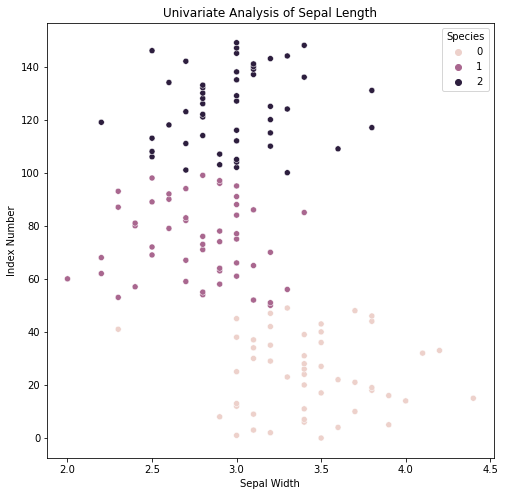

In [14]:
# Plotting for 'SepalWidthCm' 
fig, ax = plt.subplots()
sns.scatterplot(y = data.index, x = data['SepalWidthCm'], data = data, ax = ax, hue = data['Species'])
ax.set_title('Univariate Analysis of Sepal Length')
ax.set_ylabel('Index Number')
ax.set_xlabel('Sepal Width')
plt.show()

**Observations:**
- From the above plot we can make rough observation that we can simply use if-else conditions to seperate the Species.
- Yes, we can see some overlaps between the 'Sepal Lengths' of the species but most of the points can be easily classified.
- Overlap between 'Sepal Width' of "versicolor" & "Virginica" is large, so we need to focus more on other features.

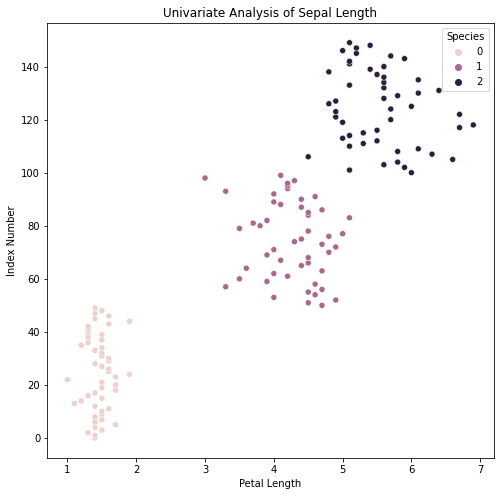

In [15]:
# Plotting for 'PetalLengthCm' 
fig, ax = plt.subplots()
sns.scatterplot(y = data.index, x = data['PetalLengthCm'], data = data, ax = ax, hue = data['Species'])
ax.set_title('Univariate Analysis of Sepal Length')
ax.set_ylabel('Index Number')
ax.set_xlabel('Petal Length')
plt.show()

**Observations:**
- Great, from the above plot we can clearly observe that we can simply use if-else conditions to seperate the Species.
- Yes, we can see some overlaps between the 'Petal Lengths' of the species but most of the points can be easily classified.

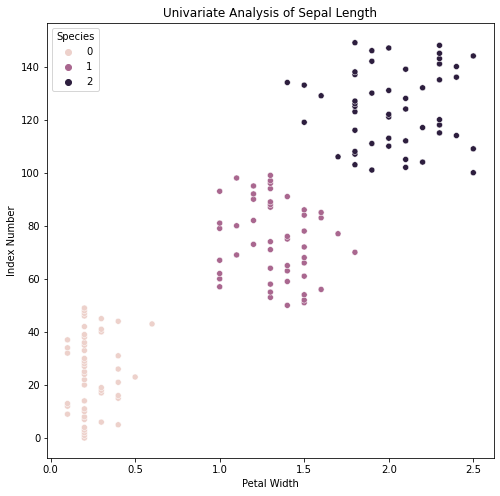

In [16]:
# Plotting for 'PetalWidthCm' 
fig, ax = plt.subplots()
sns.scatterplot(y = data.index, x = data['PetalWidthCm'], data = data, ax = ax, hue = data['Species'])
ax.set_title('Univariate Analysis of Sepal Length')
ax.set_ylabel('Index Number')
ax.set_xlabel('Petal Width')
plt.show()

**Observations:**
- Great, from the above plot we can clearly observe that we can simply use if-else conditions to seperate the Species.
- Yes, we can see some overlaps between the 'Petal Width' of the species but most of the points can be easily classified.

## Multivariate Analysis

- As there are only 4 Features we can apply Multivariate Analysis. 
- If we have 1000's of features then Multivariate Analysis makes sense but it can also be very expensive task.
- Furthermore we can make visualization only till 3-D. So we can go for it. But it is suggested to use Bi-variate analysis to understand the relationships easily.

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


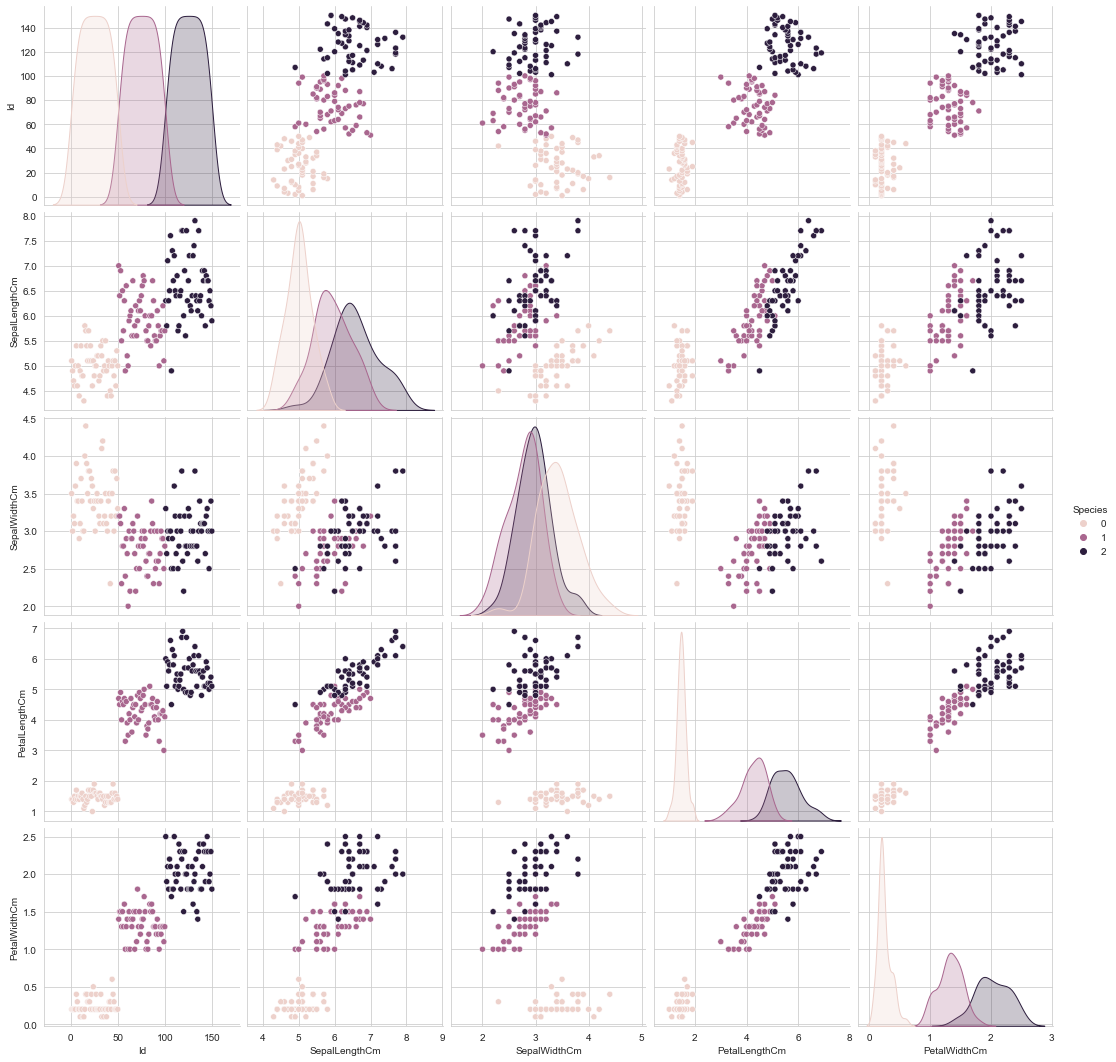

In [17]:
# We can use Pairplots to make Bi-Variate Analysis
sns.set_style("whitegrid");
sns.pairplot(data, hue = "Species", size=3);
plt.show()

**Observations**
1. 'Petal Length' and 'Petal Width' are the most useful features to identify various types of Species.
2. While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# 3. Preprocessing

In [18]:
# Removing Unwanted Columns
final_data = data.drop(['Id'], axis = 1)
final_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# Divide the data into "attributes" (inputs) and "labels" (outputs).

# Preparing Data
x = final_data.iloc[:, :-1].values
y = final_data.iloc[:, -1].values

In [20]:
# Splitting the data into Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Standardization or Normalization of the Data

- It is a good practice to standardize or normalize the data.
- In our case we have four columns 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' which are in the same scale so we can avoid the standardization step.

# 4. Modeling

**Note:**
- We can try various classifiers to get the actual results and then choose the best classifiers to predict the exact Species.
- But in our task we have to use decision Tree classifier so we will build Decision Tree Classifier and tune hyper-parameters to predict the Species.

## 1. Decision Tree Classifier

In [21]:
# Training the Polynomial Regression model
dt_clf = DecisionTreeClassifier()

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Criterion
criterion = ['gini', 'entropy']
# Splitter
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 15, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

# Create the random grid
dt_param = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'criterion': criterion}

# Training the Decision Tree Classifier model 
grid_dt_clf = GridSearchCV(dt_clf, dt_param, scoring = 'accuracy', cv = 5)
grid_dt_clf.fit(x_train, y_train)
print('Training Completed')

Training Completed


In [22]:
print ("Best Parameters : ",grid_dt_clf.best_params_)

Best Parameters :  {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}


In [23]:
# Predicting the Train results
y_pred_dt_clf_tr = grid_dt_clf.predict(x_train)

In [24]:
# Comparing Actual vs Predicted
df_for_dt_clf_tr = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_dt_clf_tr})  
df_for_dt_clf_tr

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,2,2
...,...,...
115,0,0
116,2,2
117,1,1
118,2,2


In [25]:
# Evaluating the Model
print('Accuracy for Decision Tree Classifier on Train Data: \n', metrics.accuracy_score(y_train, y_pred_dt_clf_tr))
print('Confusion matrix for Decision Tree Classifier on Train Data: \n', metrics.confusion_matrix(y_train, y_pred_dt_clf_tr))

Accuracy for Decision Tree Classifier on Train Data: 
 0.9666666666666667
Confusion matrix for Decision Tree Classifier on Train Data: 
 [[39  0  0]
 [ 0 36  1]
 [ 0  3 41]]


In [26]:
# Predicting the Test set results
y_pred_dt_clf = grid_dt_clf.predict(x_test)

In [27]:
# Comparing Actual vs Predicted
df_for_dt_clf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt_clf})  
df_for_dt_clf

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [28]:
# Evaluating the Model
print('Accuracy for Decision Tree Classifier on Test Data: \n', metrics.accuracy_score(y_test, y_pred_dt_clf))
print('Confusion matrix for Decision Tree Classifier on Test Data: \n', metrics.confusion_matrix(y_test, y_pred_dt_clf))

Accuracy for Decision Tree Classifier on Test Data: 
 0.9333333333333333
Confusion matrix for Decision Tree Classifier on Test Data: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]


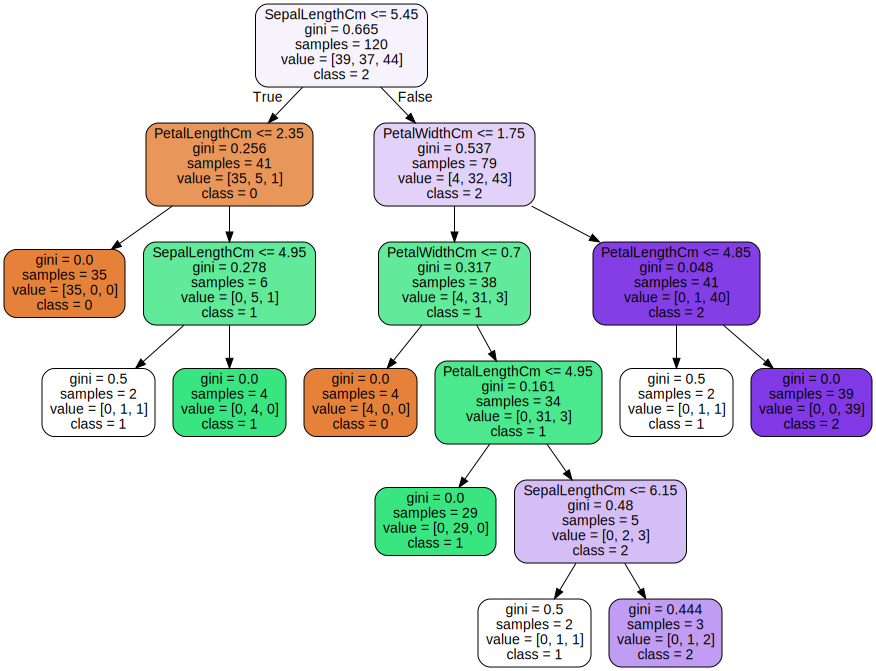

In [29]:
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# DOT data
dot_data = export_graphviz(grid_dt_clf.best_estimator_, out_file = None, filled = True, rounded = True,
                           feature_names = features, class_names = ['0', '1', '2'])

# Draw graph
graph = graphviz.Source(dot_data, format = "png") 
graph

In [30]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_dt_clf = grid_dt_clf.predict([[5.2, 3.4, 1.5, 0.3]])
print('The predicted Species for [5.2, 3.4, 1.5, 0.3] is {}.'.format((abs_pred_dt_clf)))

The predicted Species for [5.2, 3.4, 1.5, 0.3] is [0].


# 5. Showing Results in Table

In [31]:
x = PrettyTable()

x.field_names = ["Sr. No.", "Type of Model", "Accuracy", "Sample Input", "Predicted Species"]

x.add_row([1, "Decision Tree Classifier", 1.0, [5.2, 3.4, 1.5, 0.3], 0])

print(x)

+---------+--------------------------+----------+----------------------+-------------------+
| Sr. No. |      Type of Model       | Accuracy |     Sample Input     | Predicted Species |
+---------+--------------------------+----------+----------------------+-------------------+
|    1    | Decision Tree Classifier |   1.0    | [5.2, 3.4, 1.5, 0.3] |         0         |
+---------+--------------------------+----------+----------------------+-------------------+


# 6. Conclusions

- From the above table we can conclude that the Accuracy given by Decision Tree Classifier is found to be 1.0 on test data, so we will choose the **'Decision Tree Classifier'** model as a finalized model.

# 7. Saving The Trained Model For Future Usage

In [32]:
# Save the model to disk
filename = 'Finalized_Model'
pickle.dump(grid_dt_clf, open(filename, 'wb'))

In [33]:
# Making Prediction using Saved Model
 
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([[5.2, 3.4, 1.5, 0.3]])
print('The predicted Species for [5.2, 3.4, 1.5, 0.3] is {}.'.format((result)))

The predicted Species for [5.2, 3.4, 1.5, 0.3] is [0].


# 8. Final Comments

- We have built an excellent classifier by using Decision Trees which successfully classifies the Species of flowers by using 4 features viz. 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'.
- Our model is not overfitting as we get **96.66%** accuracy on train data and it behaves well on test data also which gives accuracy of **100%.**

# End of Notebook